In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm
import numpy as np # linear algebra

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd

df = pd.read_csv("traffic_accidents.csv")
df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# to remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#adding a 'year' column
df['crash_year'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.year.astype('int64')

In [ ]:
#lets go over the data:
print("📊 Dataset Overview")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")

# Display basic info
df.info()

📊 Dataset Overview
Dataset Shape: (209275, 25)
Total Rows: 209,275
Features: 25
<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209275 non-null  object 
 1   traffic_control_device         209275 non-null  object 
 2   weather_condition              209275 non-null  object 
 3   lighting_condition             209275 non-null  object 
 4   first_crash_type               209275 non-null  object 
 5   trafficway_type                209275 non-null  object 
 6   alignment                      209275 non-null  object 
 7   roadway_surface_cond           209275 non-null  object 
 8   road_defect                    209275 non-null  object 
 9   crash_type                     209275 non-null  object 
 10  intersection_related_i         209275 non-null  object 
 11  damage          

In [ ]:
#Summary Statistics (mean, median, mode, etc.)
numerical_stats = df.select_dtypes(include=['int64', 'float64']).describe()
numerical_stats.round(2)

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year
count,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00
mean,2.06,0.38,0.00,0.04,0.22,0.12,2.24,13.37,4.14,6.77,2020.42
std,0.40,0.80,0.05,0.23,0.61,0.45,1.24,5.60,1.97,3.43,2.43
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2013.00
25%,2.00,0.00,0.00,0.00,0.00,0.00,2.00,9.00,2.00,4.00,2018.00
50%,2.00,0.00,0.00,0.00,0.00,0.00,2.00,14.00,4.00,7.00,2020.00
75%,2.00,1.00,0.00,0.00,0.00,0.00,3.00,17.00,6.00,10.00,2023.00
max,11.00,21.00,3.00,7.00,21.00,15.00,49.00,23.00,7.00,12.00,2025.00


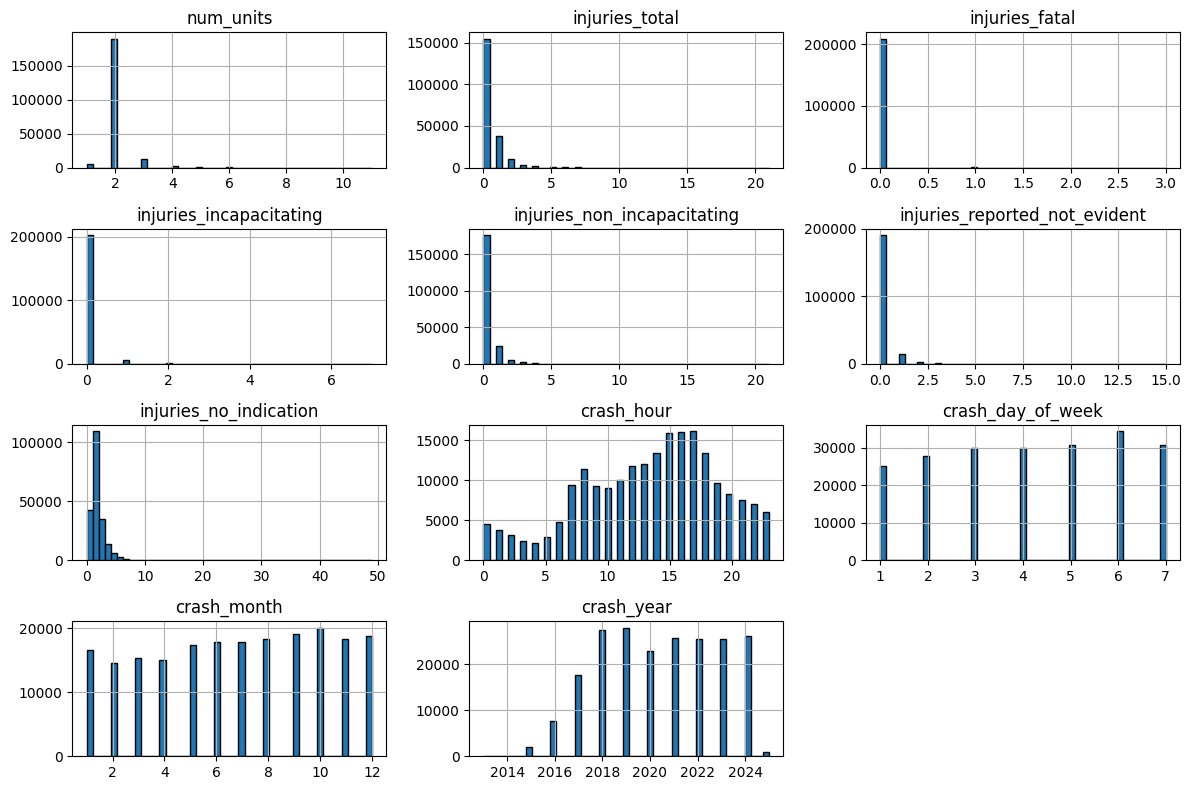

In [ ]:
# Histogram for numerical features
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 8),bins = 47,rwidth=1.2, edgecolor='black')
plt.tight_layout()
plt.show()

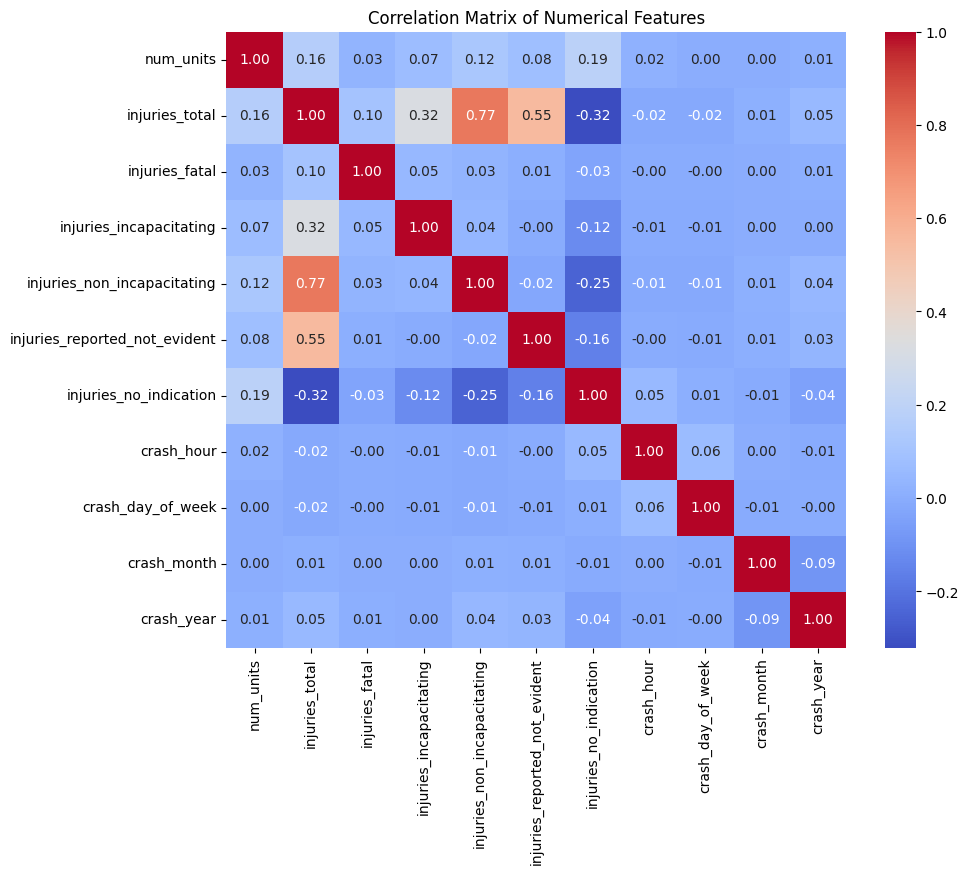

In [ ]:
#Correlation Analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
plt.close()

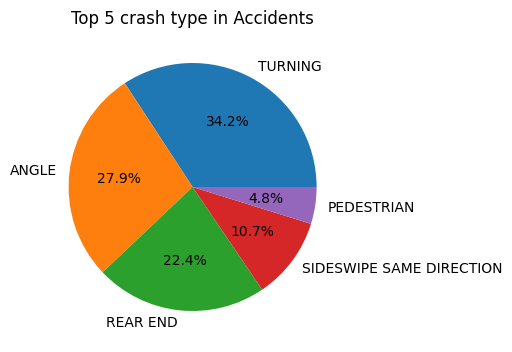

In [ ]:
# pie chart for top 5 Crash types
plt.figure(figsize=(4, 6))
df['first_crash_type'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 crash type in Accidents')
plt.ylabel("")
plt.show()
plt.close()


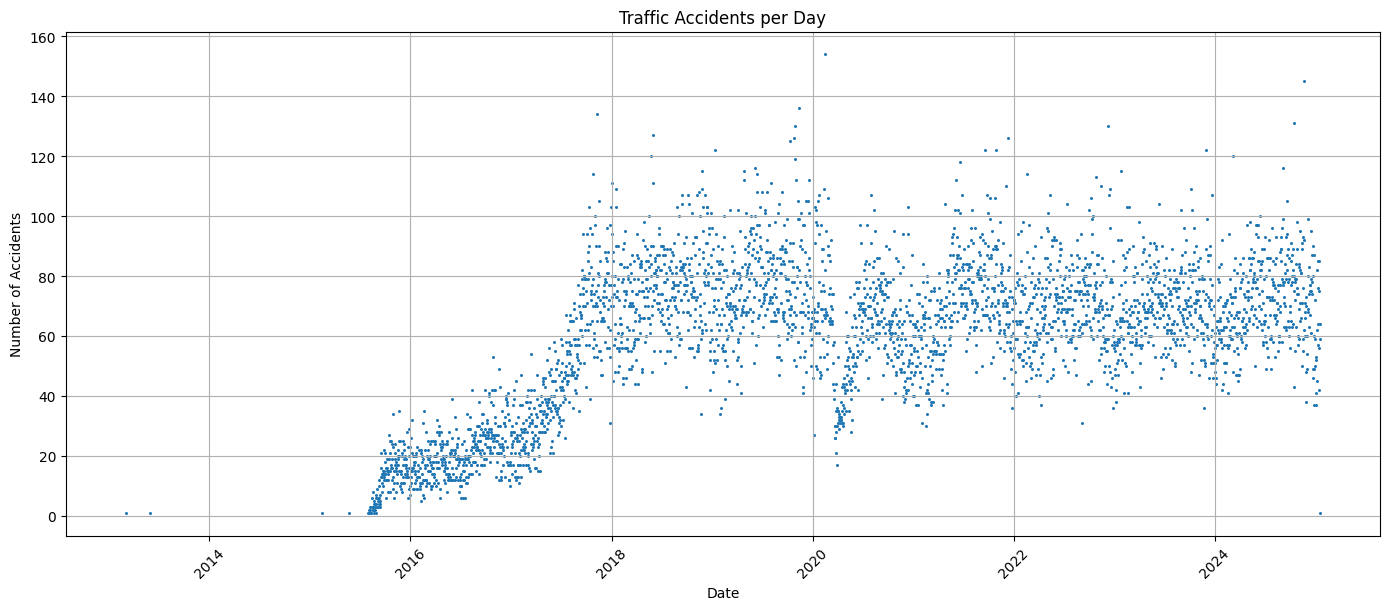

In [ ]:
df['accident_time'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract just the date (drop time)
df['accident_date'] = df['accident_time'].dt.date

# Count accidents per day
accidents_per_day = df.groupby('accident_date').size()

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(accidents_per_day.index, accidents_per_day.values, marker='o', linestyle='-', s=1.4)
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Traffic Accidents per Day')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Number of Crashes')

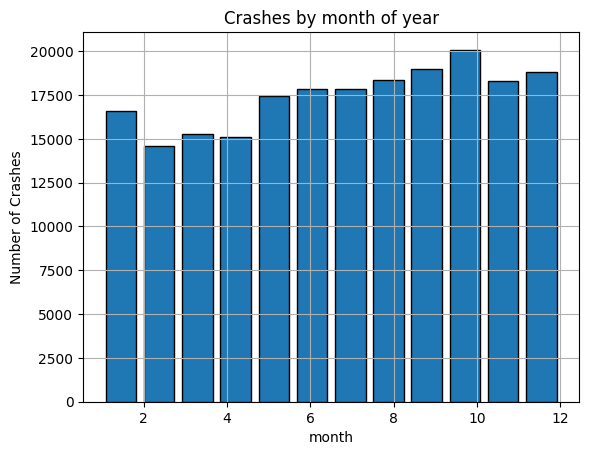

In [ ]:
df['crash_month'].hist(bins=12,rwidth=0.8, edgecolor='black')
plt.title("Crashes by month of year")
plt.xlabel("month")
plt.ylabel("Number of Crashes")

Text(0, 0.5, 'Number of Crashes')

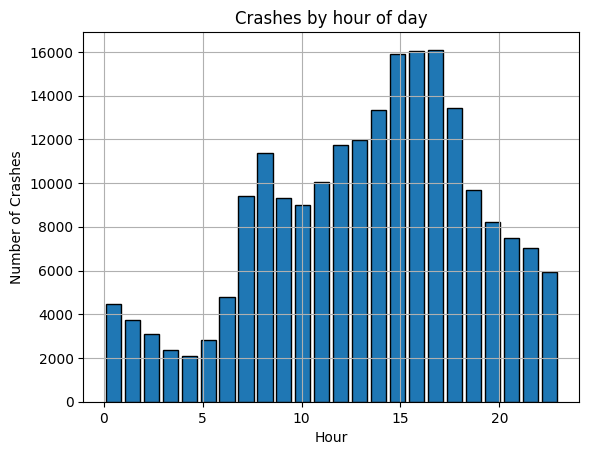

In [ ]:
df['crash_hour'].hist(bins=24,rwidth=0.8, edgecolor='black')
plt.title("Crashes by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of Crashes")

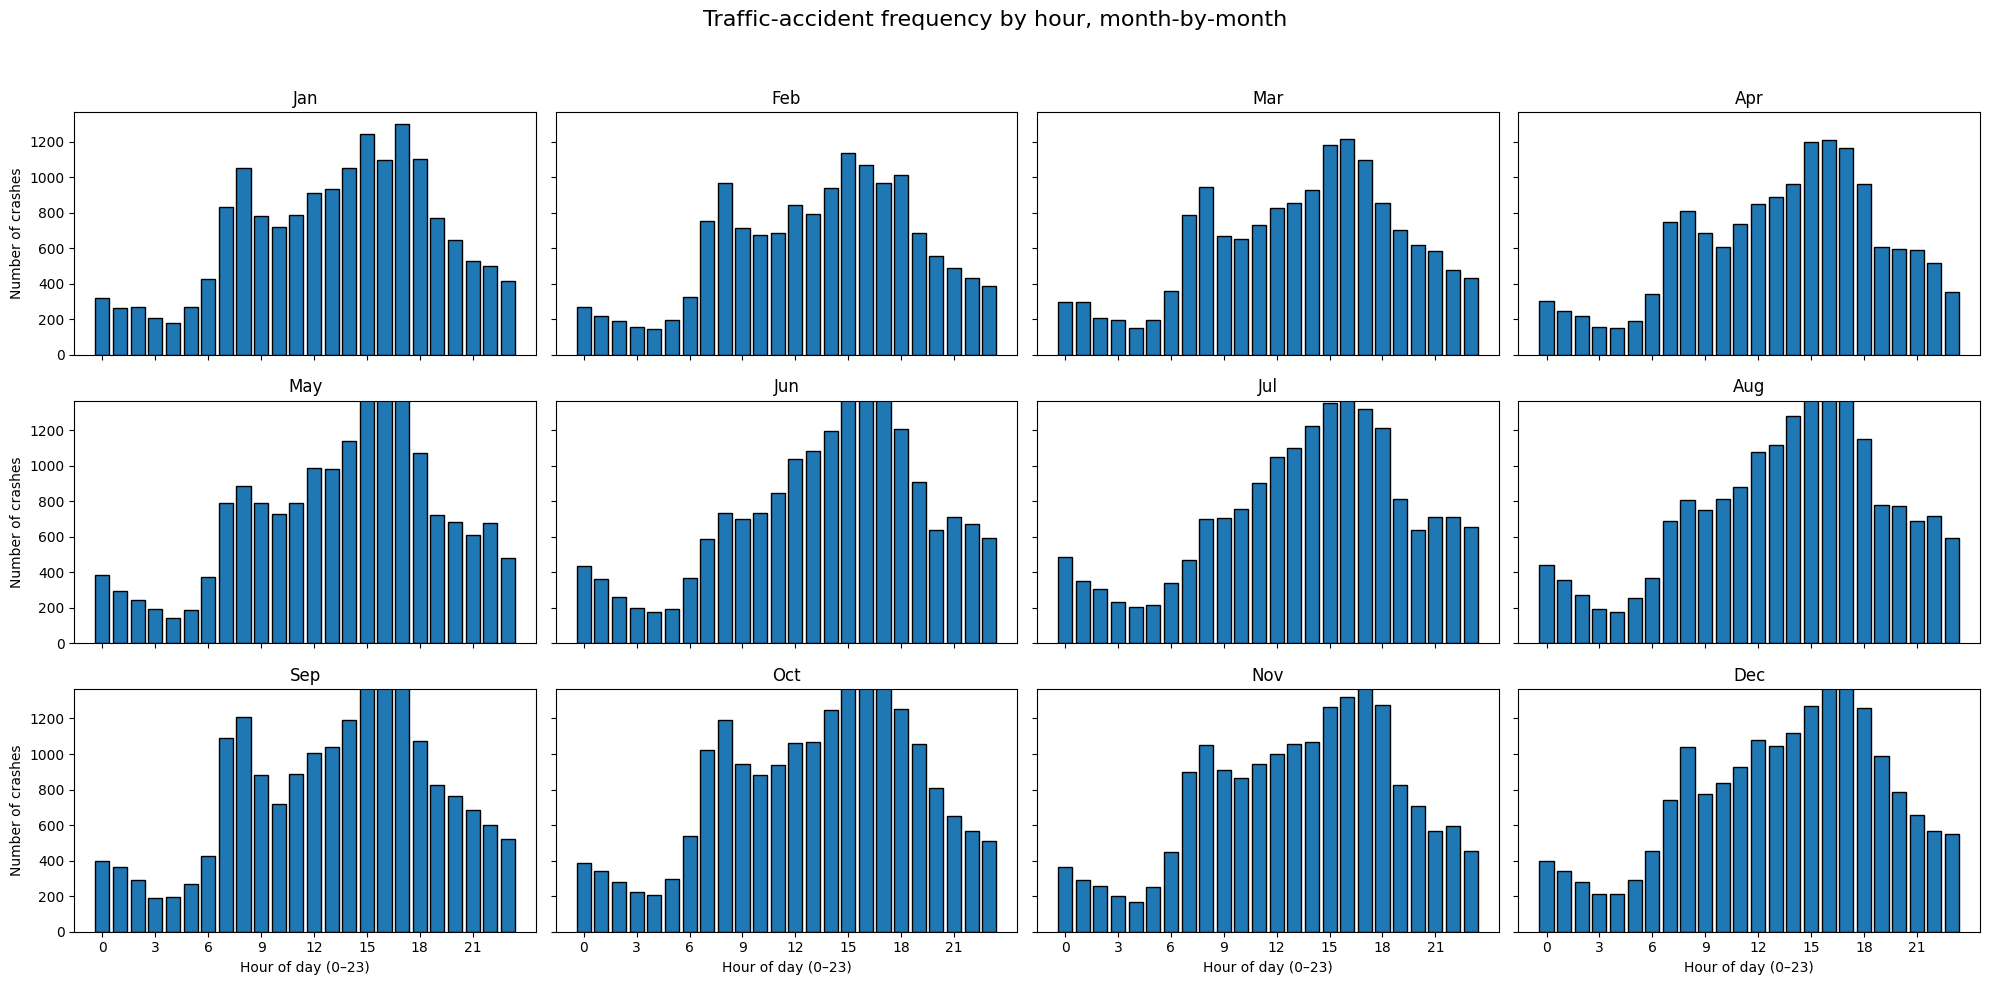

In [ ]:
# # Make sure hour is numeric
# df['crash_hour'] = pd.to_numeric(df['crash_hour'], errors='coerce')

# Set up a 3×4 grid of sub‑plots
fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Traffic‑accident frequency by hour, month‑by‑month', fontsize=16)

# Draw one bar‑chart per month
for month, ax in zip(range(1, 13), axes.flatten()):
    hourly_counts = (
        df.loc[df['crash_month'] == month, 'crash_hour']      # pick that month
          .value_counts()                                     # count per hour
          .reindex(range(24), fill_value=0)                   # ensure 0–23 exist
          .sort_index()
    )

    ax.bar(hourly_counts.index,
           hourly_counts.values,
           width=0.8, edgecolor='black')

    ax.set_title(calendar.month_abbr[month])
    ax.set_xticks(range(0, 24, 3))          # ticks every 3 h to reduce clutter
    ax.set_ylim(bottom=0)                   # start y‑axis at zero

# Global axis labels & layout
for ax in axes[-1]:                  # bottom row: add x‑label only once
    ax.set_xlabel('Hour of day (0–23)')
for ax in axes[:, 0]:                # first column: add y‑label only once
    ax.set_ylabel('Number of crashes')

fig.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the big title
plt.show()

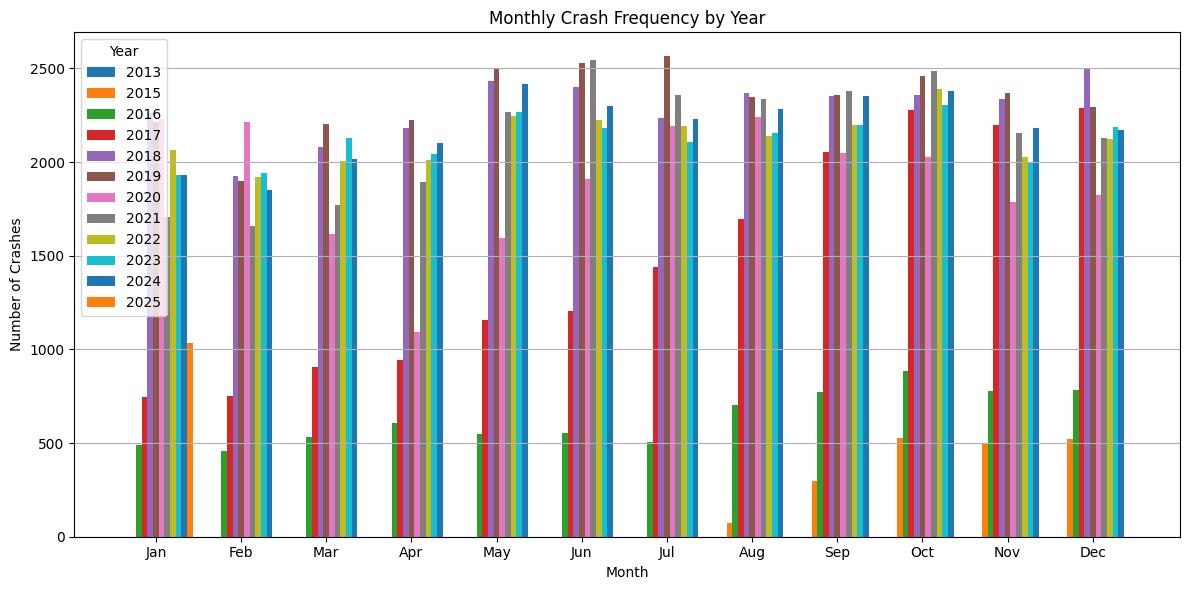

In [ ]:
# Group by month and year, count crashes
monthly_counts = df.groupby(['crash_year', 'crash_month']).size().unstack(level=0).fillna(0)

# Setup plot
months = np.arange(1, 13)
bar_width = 0.8 / len(monthly_counts.columns)  # split width among years
plt.figure(figsize=(12, 6))

# Plot each year with a small shift so bars don't overlap
for i, year in enumerate(monthly_counts.columns):
    plt.bar(months + i * bar_width, monthly_counts[year],
            width=bar_width, label=str(year), align='edge')

# Format the plot
plt.title("Monthly Crash Frequency by Year")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(months + bar_width * (len(monthly_counts.columns) - 1) / 2,  # center the ticks
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3276765924.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', 12)  # You can try 'nipy_spectral', 'Set3', 'hsv', etc.


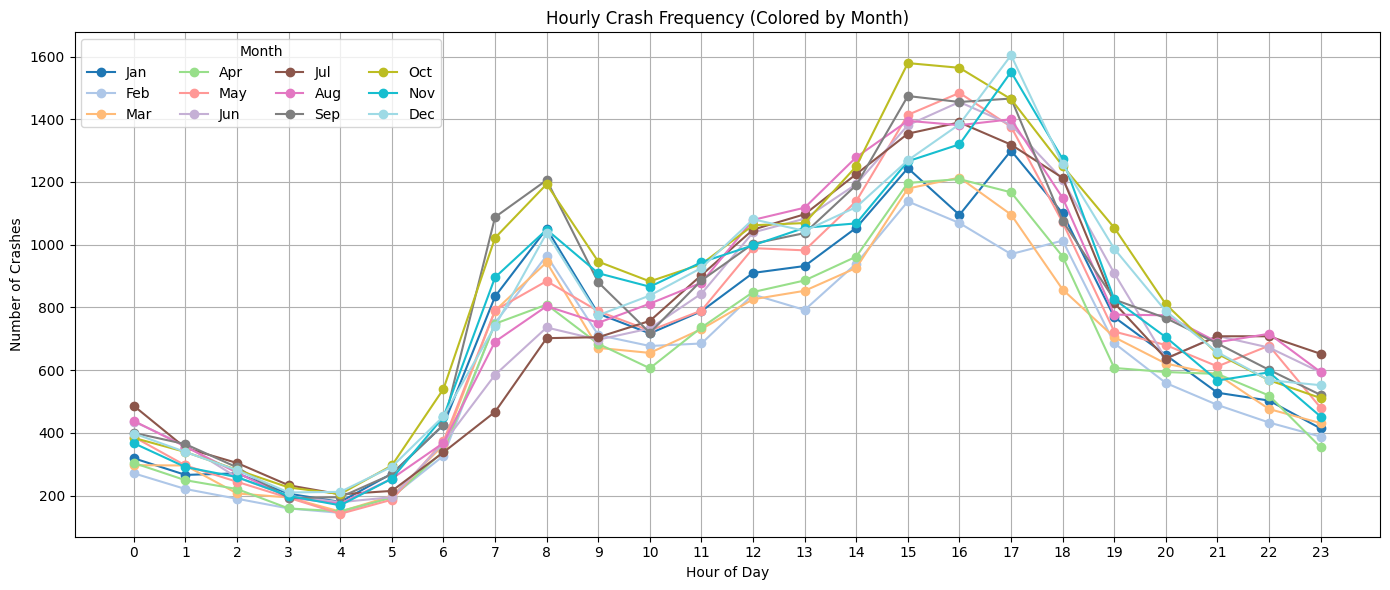

In [ ]:
# Group by hour and month
hourly_by_month = (
    df.groupby(['crash_hour', 'crash_month'])
      .size()
      .unstack(fill_value=0)
      .reindex(index=range(24), columns=range(1, 13))
)

# Get a colormap and generate 12 distinct colors
cmap = cm.get_cmap('tab20', 12)  # You can try 'nipy_spectral', 'Set3', 'hsv', etc.

# Plot
plt.figure(figsize=(14, 6))
for i, month in enumerate(hourly_by_month.columns):
    plt.plot(hourly_by_month.index, hourly_by_month[month],
             label=calendar.month_abbr[month],
             color=cmap(i),
             marker='o')

plt.title('Hourly Crash Frequency (Colored by Month)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.legend(title='Month', ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()

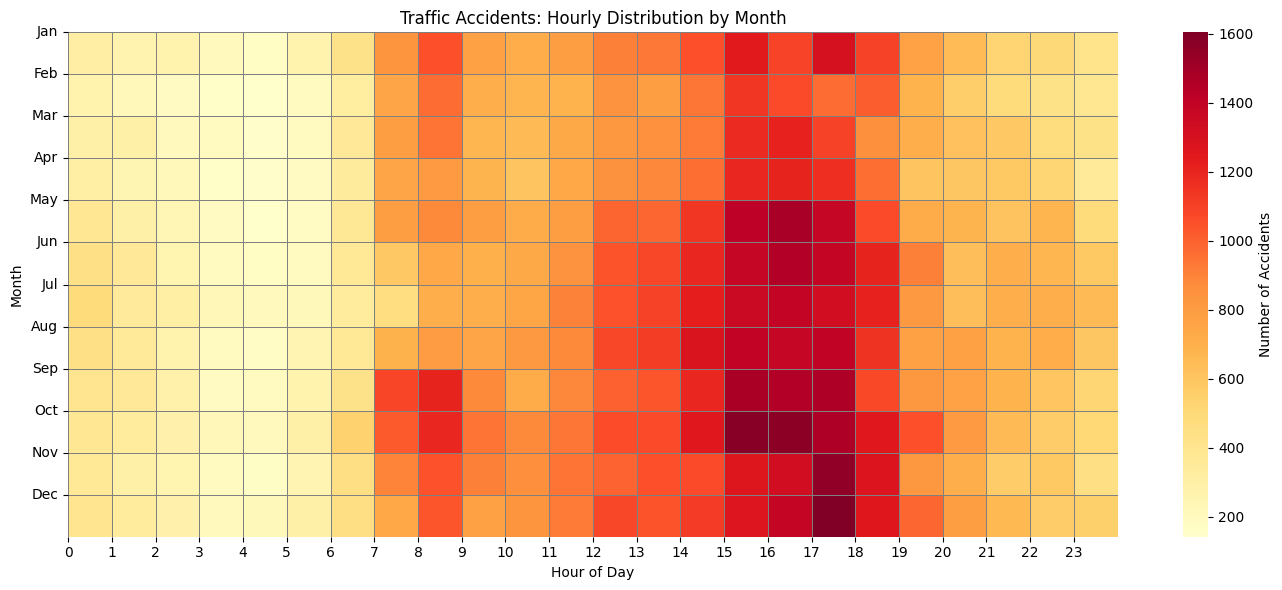

In [ ]:

# Group by month and hour
heatmap_data = (
    df.groupby(['crash_month', 'crash_hour'])
      .size()
      .unstack(fill_value=0)
      .reindex(index=range(1, 13), columns=range(24))  # Month as rows, hour as cols
)

# Plot the flipped heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Number of Accidents'})

# Set axis labels and ticks
plt.title('Traffic Accidents: Hourly Distribution by Month')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
 df['first_crash_type'].value_counts()

,count
first_crash_type,
TURNING,64150
ANGLE,52243
REAR END,42007
SIDESWIPE SAME DIRECTION,20114
PEDESTRIAN,8995
PEDALCYCLIST,5335
PARKED MOTOR VEHICLE,4892
FIXED OBJECT,4742
SIDESWIPE OPPOSITE DIRECTION,1839


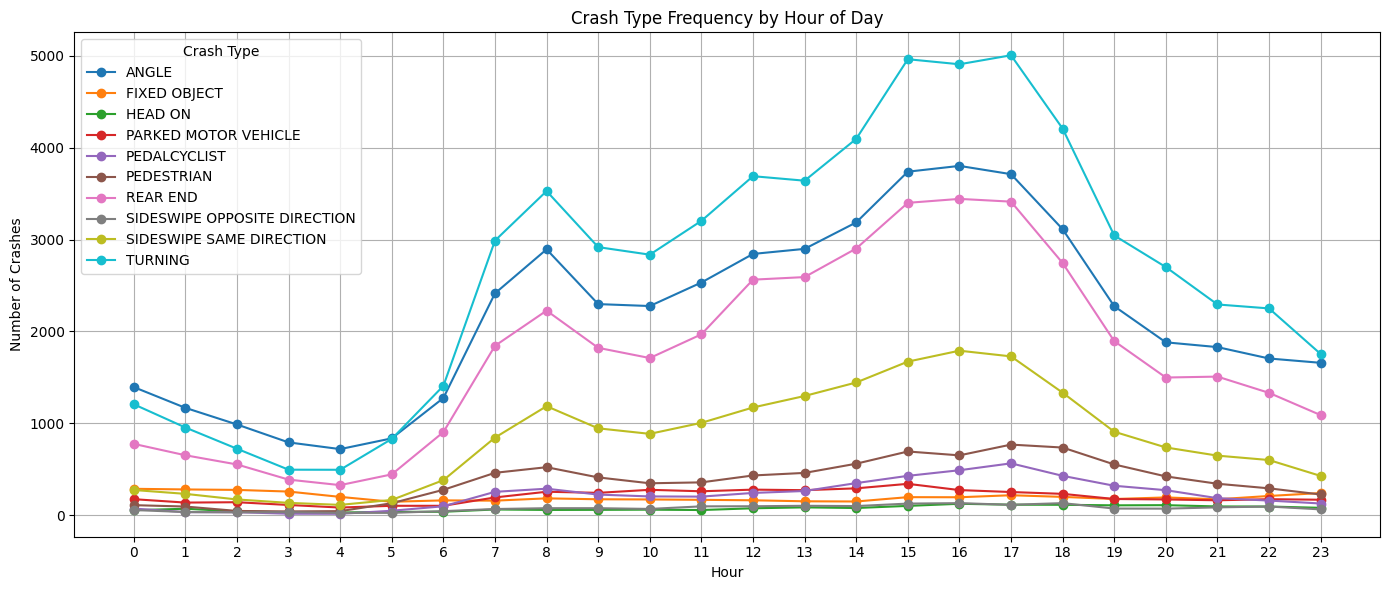

In [ ]:
# Get top 10 crash types
top10 = df['first_crash_type'].value_counts().head(10).index

# Filter for only those crash types
filtered = df[df['first_crash_type'].isin(top10)]

# Group by hour and crash type
hourly_counts = (
    filtered.groupby(['crash_hour', 'first_crash_type'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=range(24))  # make sure all 0–23 are shown
)

# Plot
plt.figure(figsize=(14, 6))
for crash_type in hourly_counts.columns:
    plt.plot(hourly_counts.index, hourly_counts[crash_type], marker='o', label=crash_type)

plt.title('Crash Type Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.legend(title='Crash Type')
plt.grid(True)
plt.tight_layout()
plt.show()

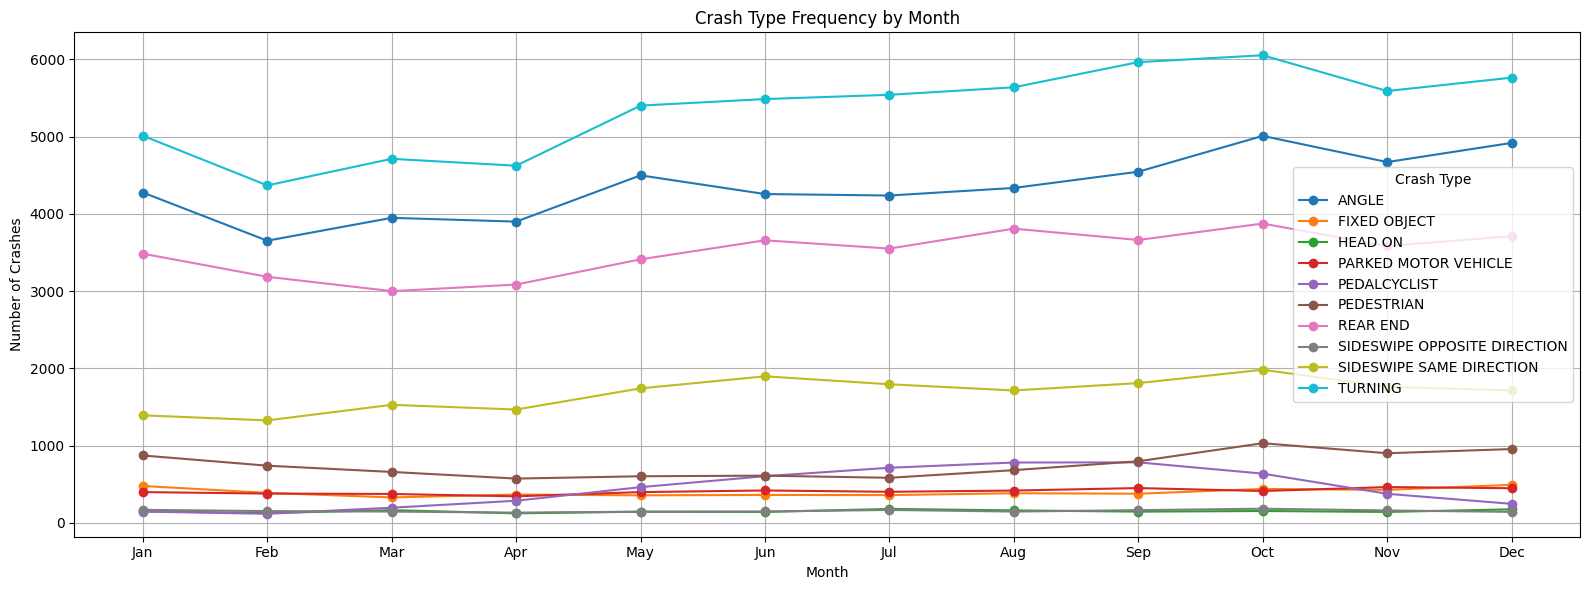

In [ ]:
monthly_counts = (
    filtered.groupby(['crash_month', 'first_crash_type'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=range(1, 13))
)

plt.figure(figsize=(16, 6))
for crash_type in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[crash_type], marker='o', label=crash_type)

plt.title('Crash Type Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Crash Type')
plt.grid(True)
plt.tight_layout()
plt.show()

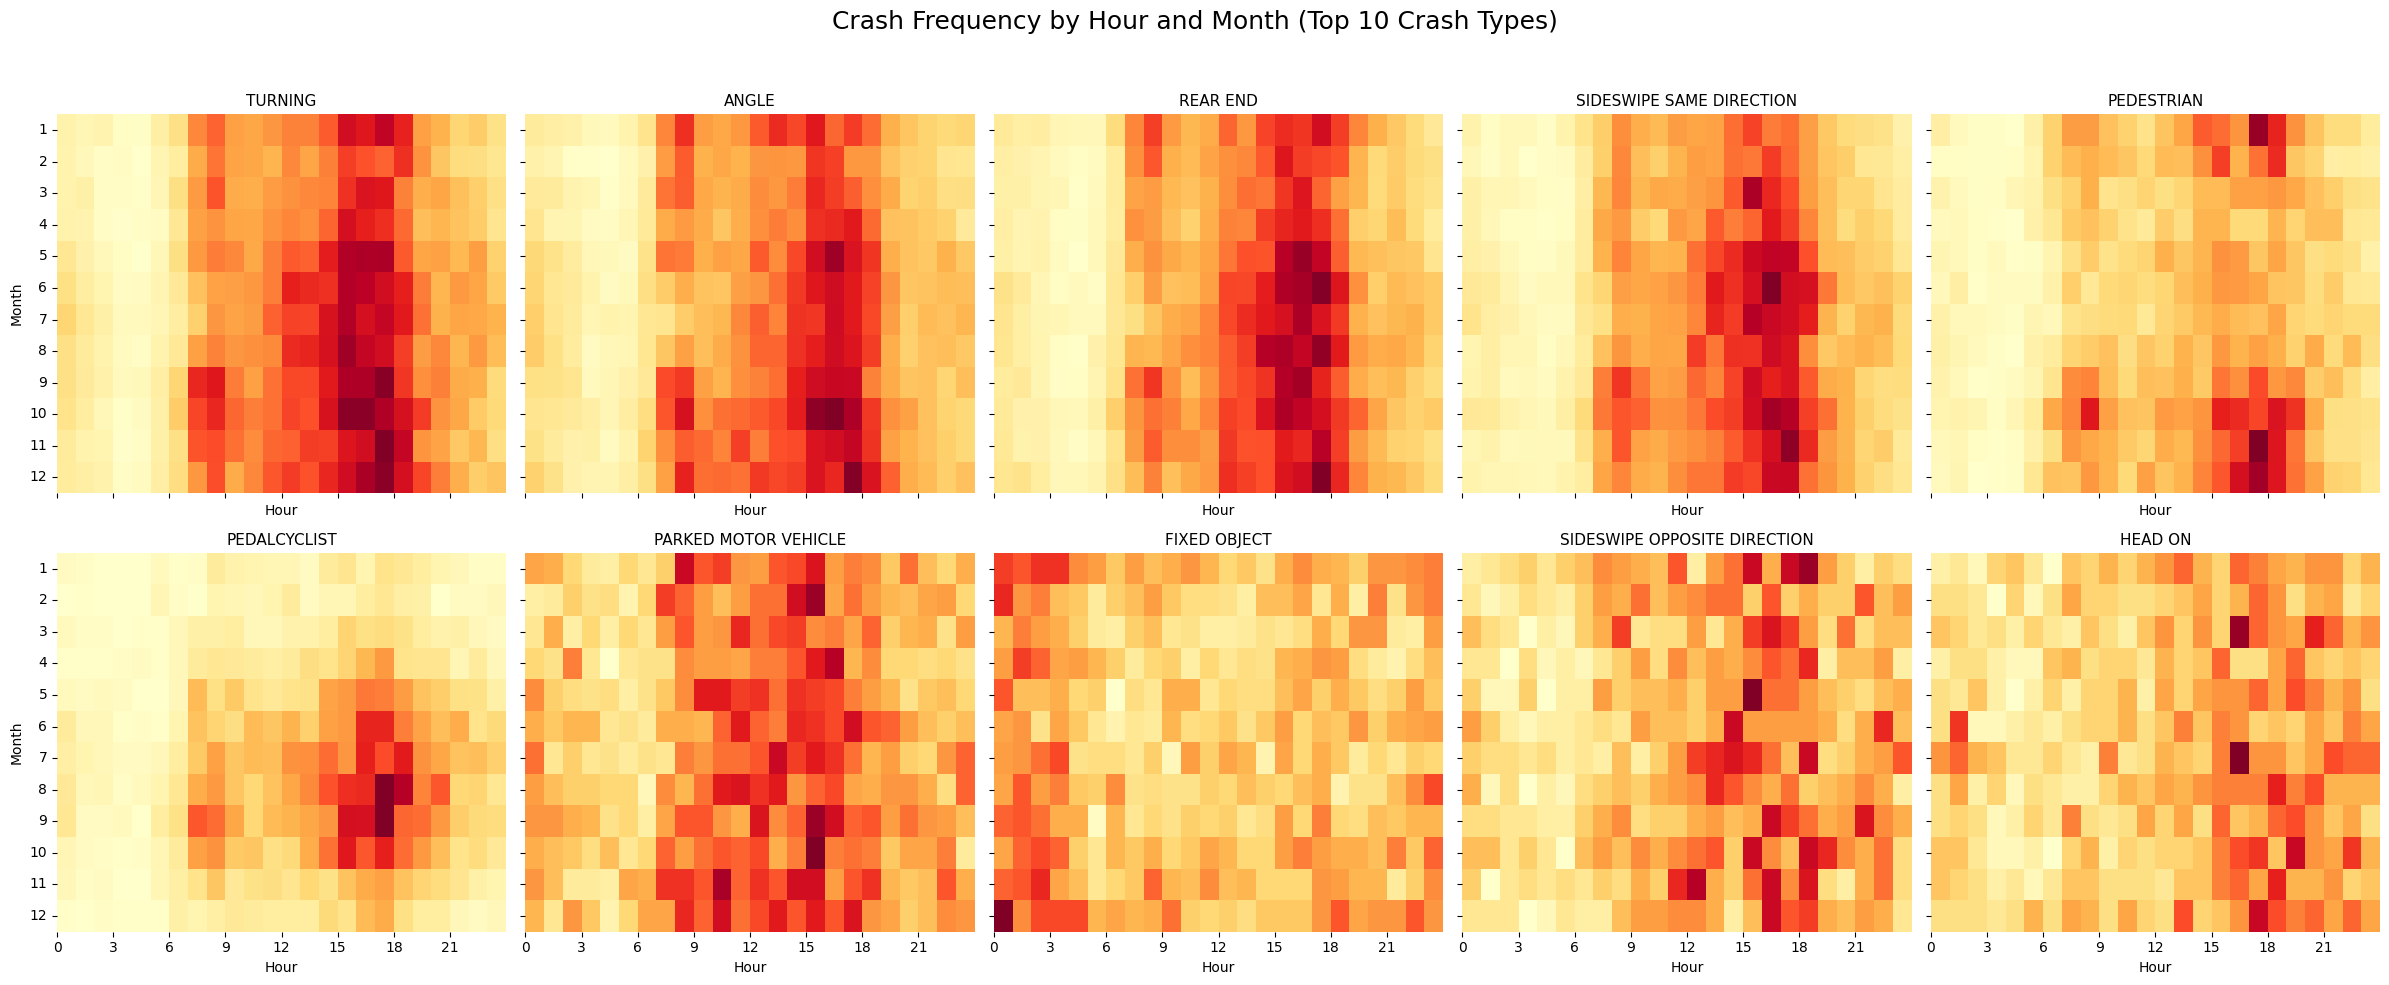

In [ ]:
# Top 10 crash types
top10 = df['first_crash_type'].value_counts().head(10).index
filtered = df[df['first_crash_type'].isin(top10)]

# Create a 2×5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 10), sharex=True, sharey=True)
fig.suptitle("Crash Frequency by Hour and Month (Top 10 Crash Types)", fontsize=18)
axes = axes.flatten()

# Loop over each crash type and plot heatmap
for i, crash_type in enumerate(top10):
    data = (
        filtered[filtered['first_crash_type'] == crash_type]
        .groupby(['crash_month', 'crash_hour'])
        .size()
        .unstack(fill_value=0)
        .reindex(index=range(1, 13), columns=range(24))
    )

    sns.heatmap(data, ax=axes[i], cmap='YlOrRd', cbar=False)
    axes[i].set_title(crash_type, fontsize=11)

    # X-axis: show hour ticks
    axes[i].set_xlabel("Hour")
    axes[i].set_xticks(range(0, 24, 3))
    axes[i].set_xticklabels(range(0, 24, 3))

    # Y-axis: only on first column
    if i % 5 == 0:
        axes[i].set_ylabel("Month")
        axes[i].set_yticks(range(1, 13))
        axes[i].set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                                 'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
    else:
        axes[i].set_ylabel("")

# Remove unused axes if any (in case fewer than 10)
for j in range(len(top10), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report


In [ ]:
target_col = "most_severe_injury"   # CHANGE IF NEEDED

# Drop missing target rows
df = df.dropna(subset=[target_col])

# Encode categorical target
le = LabelEncoder()
df["target_num"] = le.fit_transform(df[target_col])


In [ ]:
X = df.drop([target_col, "target_num"], axis=1)
y_linear = df["target_num"]    # For Linear Regression
y_tree = df[target_col]        # For Decision Tree


In [ ]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month', 'crash_year', 'has_injury']
Categorical: ['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'accident_date']


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [ ]:
linear_model = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

X_train, X_test, y_train_lin, y_test_lin = train_test_split(
    X, y_linear, test_size=0.2, random_state=42
)

linear_model.fit(X_train, y_train_lin)

y_pred_lin = linear_model.predict(X_test)

print("🔵 Linear Regression R² Score:", r2_score(y_test_lin, y_pred_lin))


🔵 Linear Regression R² Score: 0.8721050685539871


In [ ]:
tree_model = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=None, random_state=42
    ))
])

X_train, X_test, y_train_tree, y_test_tree = train_test_split(
    X, y_tree, test_size=0.2, random_state=42, stratify=y_tree
)

tree_model.fit(X_train, y_train_tree)

y_pred_tree = tree_model.predict(X_test)

print("🌳 Decision Tree Accuracy:", accuracy_score(y_test_tree, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test_tree, y_pred_tree))


🌳 Decision Tree Accuracy: 1.0

Classification Report:
                           precision    recall  f1-score   support

                   FATAL       1.00      1.00      1.00        70
   INCAPACITATING INJURY       1.00      1.00      1.00      1313
 NO INDICATION OF INJURY       1.00      1.00      1.00     30953
NONINCAPACITATING INJURY       1.00      1.00      1.00      6304
   REPORTED, NOT EVIDENT       1.00      1.00      1.00      3215

                accuracy                           1.00     41855
               macro avg       1.00      1.00      1.00     41855
            weighted avg       1.00      1.00      1.00     41855



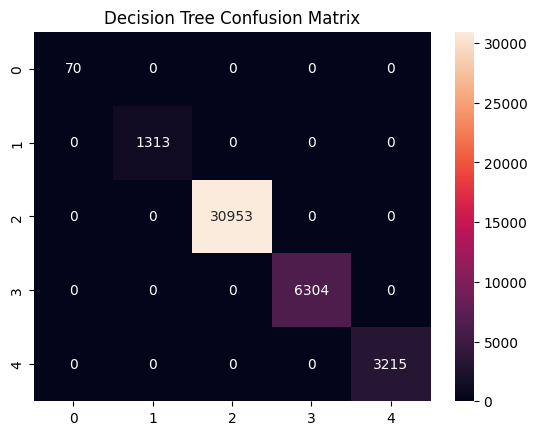

In [ ]:
sns.heatmap(confusion_matrix(y_test_tree, y_pred_tree), annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()


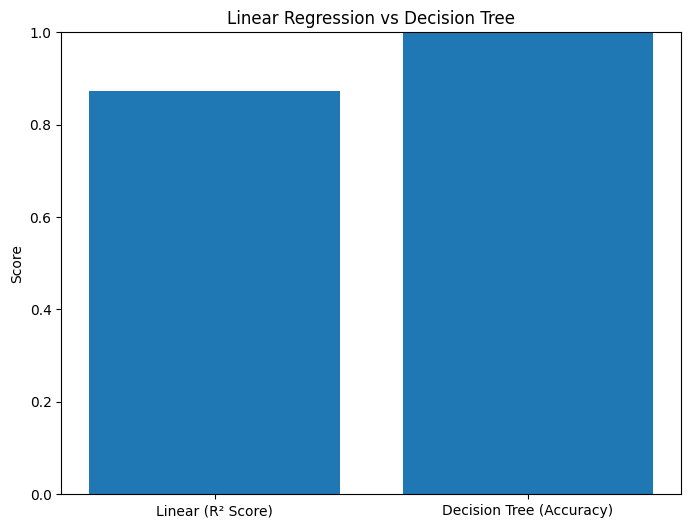

In [ ]:
import matplotlib.pyplot as plt

# Replace with your actual scores
linear_r2 = r2_score(y_test_lin, y_pred_lin)
tree_acc = accuracy_score(y_test_tree, y_pred_tree)

metrics = ["Linear (R² Score)", "Decision Tree (Accuracy)"]
scores = [linear_r2, tree_acc]

plt.figure(figsize=(8,6))
plt.bar(metrics, scores)
plt.title("Linear Regression vs Decision Tree")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()
